# 1) Prepare a classification model using SVM for salary data 

Data Description:

1. age -- age of a person
2. workclass	-- A work class is a grouping of work 
3. education	-- Education of an individuals	
4. maritalstatus -- Marital status of an individulas	
5. occupation	 -- occupation of an individuals
6. relationship -- 	
7. race --  Race of an Individual
8. sex --  Gender of an Individual
9. capitalgain --  profit received from the sale of an investment	
10. capitalloss	-- A decrease in the value of a capital asset
11. hoursperweek -- number of hours work per week	
12. native -- Native of an individual
13. Salary -- salary of an individual


In [40]:
# import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
# load the data set
salary_train=pd.read_csv("C:/Users/hp/Desktop/DATA SCIENCE COURSE/ASSIGNMENT/ASSIGNMENT 14- SVM/SalaryData_Train.csv")
salary_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [42]:
salary_train.shape

(30161, 14)

In [43]:
salary_test=pd.read_csv("C:/Users/hp/Desktop/DATA SCIENCE COURSE/ASSIGNMENT/ASSIGNMENT 14- SVM/SalaryData_Test.csv")
salary_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [44]:
salary_test.shape

(15060, 14)

In [45]:
df=salary_train.append(salary_test)
df

C:\Users\hp\AppData\Local\Temp\ipykernel_9628\1840881032.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=salary_train.append(salary_test)


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='workclass', ylabel='count'>

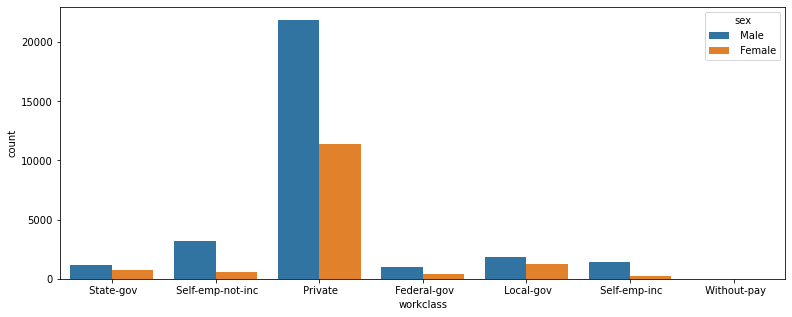

In [46]:
plt.rcParams['figure.figsize']=[13,5]
sns.countplot('workclass',hue='sex',data=df)

### Observation:
1. most of employees are working in private sector, in both male and female category.


C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='education', ylabel='count'>

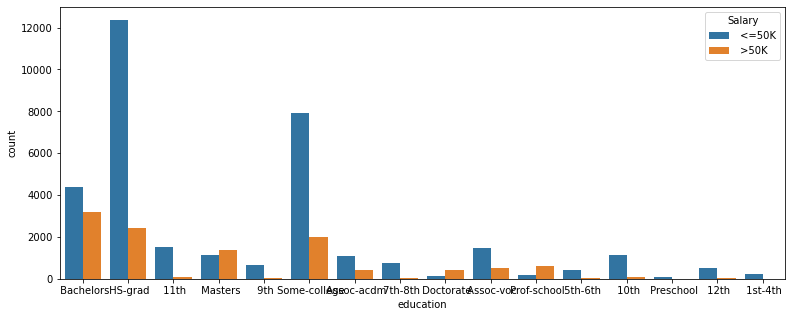

In [47]:
sns.countplot('education',hue='Salary',data=df)

 most no of peaople are from HS grad clas and salry is also high for bachlor and HS class people

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='maritalstatus', ylabel='count'>

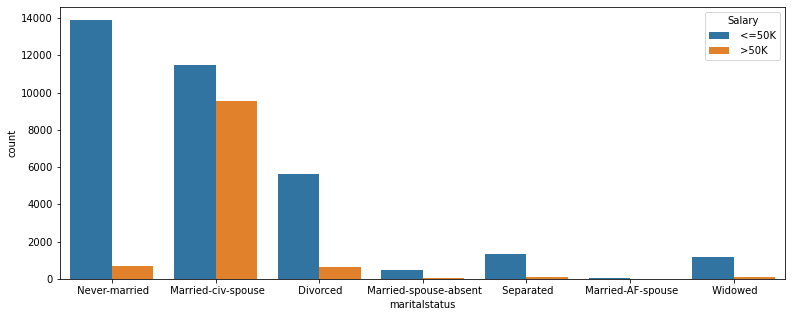

In [48]:
sns.countplot('maritalstatus',hue='Salary',data=df)

(array([  777.,  2825.,  2933., 24909.,  4482.,  5621.,  2541.,   648.,
          287.,   198.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <BarContainer object of 10 artists>)

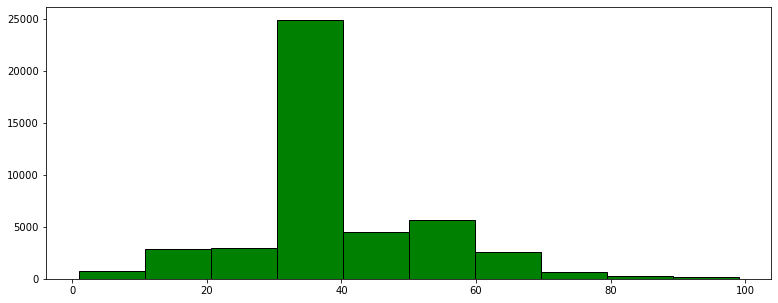

In [49]:
plt.hist('hoursperweek',edgecolor ="black",bins =10,histtype='bar',facecolor ="green",data=df)


### Working hr of most people are between 30 to 40 hr per week.

In [50]:
name=df.occupation.value_counts().values
name

array([6020, 6008, 5984, 5540, 5408, 4808, 2969, 2316, 2046, 1480, 1420,
        976,  232,   14], dtype=int64)

In [51]:
val=df.occupation.value_counts().index
val

Index([' Craft-repair', ' Prof-specialty', ' Exec-managerial', ' Adm-clerical',
       ' Sales', ' Other-service', ' Machine-op-inspct', ' Transport-moving',
       ' Handlers-cleaners', ' Farming-fishing', ' Tech-support',
       ' Protective-serv', ' Priv-house-serv', ' Armed-Forces'],
      dtype='object')

([<matplotlib.patches.Wedge at 0x1d8757e62b0>,
 [Text(0.8736563306246453, 0.6683746075065093, ' Craft-repair'),
  Text(-0.415212378953588, 1.0186258785067765, ' Prof-specialty'),
  Text(-1.0924592223579708, -0.12858012087806564, ' Exec-managerial'),
  Text(-0.22231816332968207, -1.0772996956528471, ' Adm-clerical'),
  Text(0.9160724508357196, -0.6089427434659503, ' Sales')],
 [Text(0.4765398167043519, 0.3645679677308233, '20.79%'),
  Text(-0.22647947942922977, 0.5556141155491507, '20.75%'),
  Text(-0.5958868485588931, -0.0701346113880358, '20.66%'),
  Text(-0.12126445272528112, -0.5876180158106438, '19.13%'),
  Text(0.4996758822740288, -0.33215058734506375, '18.67%')])

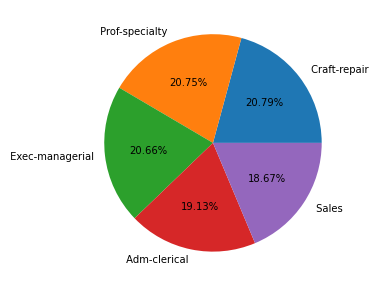

In [52]:
# top 5 occution poeple working in.
plt.pie(name[0:5],labels=val[0:5],autopct='%1.2f%%')

In [53]:
country_val=df.native.value_counts().values
country_val

array([41292,   903,   283,   193,   175,   163,   147,   147,   133,
         119,   113,   103,   101,   100,    97,    89,    86,    83,
          82,    81,    69,    62,    56,    55,    49,    48,    45,
          43,    36,    36,    29,    28,    26,    26,    23,    22,
          21,    20,    19,    18], dtype=int64)

In [54]:
country_name=df.native.value_counts().index
country_name

Index([' United-States', ' Mexico', ' Philippines', ' Germany', ' Puerto-Rico',
       ' Canada', ' El-Salvador', ' India', ' Cuba', ' England', ' China',
       ' Jamaica', ' South', ' Italy', ' Dominican-Republic', ' Japan',
       ' Guatemala', ' Vietnam', ' Columbia', ' Poland', ' Haiti', ' Portugal',
       ' Iran', ' Taiwan', ' Greece', ' Nicaragua', ' Peru', ' Ecuador',
       ' Ireland', ' France', ' Thailand', ' Hong', ' Cambodia',
       ' Trinadad&Tobago', ' Yugoslavia', ' Outlying-US(Guam-USVI-etc)',
       ' Laos', ' Scotland', ' Honduras', ' Hungary'],
      dtype='object')

([<matplotlib.patches.Wedge at 0x1d87582c460>,
 [Text(-1.0957711302530042, 0.0963619743677652, ' United-States'),
  Text(1.0935144146357278, -0.11927373970779072, ' Mexico'),
  Text(1.0997590741180112, -0.023021270492629996, ' Philippines')],
 [Text(-0.5976933437743659, 0.052561076927871916, '97.21%'),
  Text(0.5964624079831242, -0.06505840347697675, '2.13%'),
  Text(0.5998685858825515, -0.012557056632343633, '0.67%')])

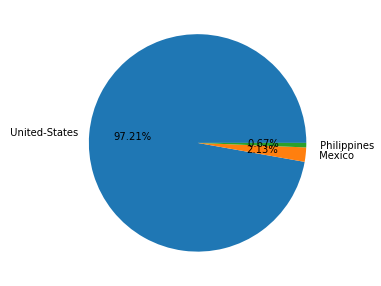

In [55]:
# top 3 occution poeple working in.
plt.pie(country_val[0:3],labels=country_name[0:3],autopct='%1.2f%%')

### Observation:
    1. Around 97.21 % people are from US then Mexico followed by philippines

In [56]:
df.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000
mean,38.548086,10.118463,1101.454700,88.548617,40.938038
std,13.217981,2.552909,7506.511295,404.838249,12.007640
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [57]:
# Handling the categorical data by using the Label encoder
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()


In [58]:
df.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [59]:
# we can apply label encoder to multi feature by x=creating function:
features=[ 'workclass', 'education', 'maritalstatus','occupation', 'relationship', 'race', 'sex', 'native',]

In [60]:
for i in features:
    salary_train[i]=LE.fit_transform(salary_train[i])
    salary_test[i]=LE.fit_transform(salary_test[i])

In [61]:
salary_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,<=50K
1,50,4,9,13,2,3,0,4,1,0,0,13,37,<=50K
2,38,2,11,9,0,5,1,4,1,0,0,40,37,<=50K
3,53,2,1,7,2,5,0,2,1,0,0,40,37,<=50K
4,28,2,9,13,2,9,5,2,0,0,0,40,4,<=50K


In [62]:
salary_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,<=50K
1,38,2,11,9,2,4,0,4,1,0,0,50,37,<=50K
2,28,1,7,12,2,10,0,4,1,0,0,40,37,>50K
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,>50K
4,34,2,0,6,4,7,1,4,1,0,0,30,37,<=50K


In [63]:
from sklearn import preprocessing 
df1=salary_train.append(salary_test)
df1


C:\Users\hp\AppData\Local\Temp\ipykernel_9628\3791239441.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1=salary_train.append(salary_test)


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,<=50K
1,50,4,9,13,2,3,0,4,1,0,0,13,37,<=50K
2,38,2,11,9,0,5,1,4,1,0,0,40,37,<=50K
3,53,2,1,7,2,5,0,2,1,0,0,40,37,<=50K
4,28,2,9,13,2,9,5,2,0,0,0,40,4,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,<=50K
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,<=50K
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,<=50K
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,<=50K


In [64]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45221 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            45221 non-null  int64 
 1   workclass      45221 non-null  int32 
 2   education      45221 non-null  int32 
 3   educationno    45221 non-null  int64 
 4   maritalstatus  45221 non-null  int32 
 5   occupation     45221 non-null  int32 
 6   relationship   45221 non-null  int32 
 7   race           45221 non-null  int32 
 8   sex            45221 non-null  int32 
 9   capitalgain    45221 non-null  int64 
 10  capitalloss    45221 non-null  int64 
 11  hoursperweek   45221 non-null  int64 
 12  native         45221 non-null  int32 
 13  Salary         45221 non-null  object
dtypes: int32(8), int64(5), object(1)
memory usage: 3.8+ MB


In [65]:
df1['Salary']=df1['Salary'].replace('>50K',1,regex=True)
df1['Salary']=df1['Salary'].replace('<=50K',2,regex=True)

In [66]:
df1

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,2
1,50,4,9,13,2,3,0,4,1,0,0,13,37,2
2,38,2,11,9,0,5,1,4,1,0,0,40,37,2
3,53,2,1,7,2,5,0,2,1,0,0,40,37,2
4,28,2,9,13,2,9,5,2,0,0,0,40,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,2
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,2
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,2
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,2


In [67]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45221.0,38.548086,13.217981,17.0,28.0,37.0,47.0,90.0
workclass,45221.0,2.204507,0.958132,0.0,2.0,2.0,2.0,6.0
education,45221.0,10.313217,3.816992,0.0,9.0,11.0,12.0,15.0
educationno,45221.0,10.118463,2.552909,1.0,9.0,10.0,13.0,16.0
maritalstatus,45221.0,2.585148,1.500460,0.0,2.0,2.0,4.0,6.0
occupation,45221.0,5.969572,4.026444,0.0,2.0,6.0,9.0,13.0
relationship,45221.0,1.412684,1.597242,0.0,0.0,1.0,3.0,5.0
race,45221.0,3.680281,0.832361,0.0,4.0,4.0,4.0,4.0
sex,45221.0,0.675062,0.468357,0.0,0.0,1.0,1.0,1.0
capitalgain,45221.0,1101.454700,7506.511295,0.0,0.0,0.0,0.0,99999.0


In [71]:
df1.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [73]:
corr=df1.corr('pearson')

<AxesSubplot:>

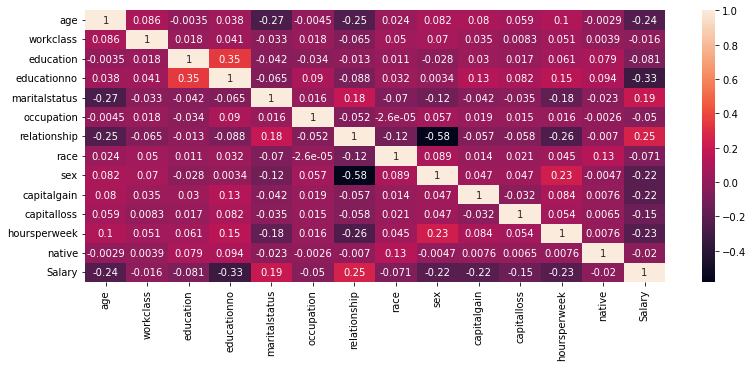

In [74]:
sns.heatmap(corr,annot=True)

### No strong correlation found in dataset

# SVM

In [76]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45221 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            45221 non-null  int64
 1   workclass      45221 non-null  int32
 2   education      45221 non-null  int32
 3   educationno    45221 non-null  int64
 4   maritalstatus  45221 non-null  int32
 5   occupation     45221 non-null  int32
 6   relationship   45221 non-null  int32
 7   race           45221 non-null  int32
 8   sex            45221 non-null  int32
 9   capitalgain    45221 non-null  int64
 10  capitalloss    45221 non-null  int64
 11  hoursperweek   45221 non-null  int64
 12  native         45221 non-null  int32
 13  Salary         45221 non-null  int64
dtypes: int32(8), int64(6)
memory usage: 3.8 MB


In [80]:
# as we have already given train and test data we can use that data for train test data
x_train=salary_train.iloc[:,0:13]
y_train=salary_train.iloc[:,13]
x_test=salary_test.iloc[:,0:13]
y_test=salary_test.iloc[:,13]

In [81]:
# normalizing the data
def norm_funct(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [84]:
x_train=norm_funct(x_train)
x_test=norm_funct(x_test)
x_test


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,0.109589,0.333333,0.066667,0.400000,0.666667,0.461538,0.6,0.50,1.0,0.000000,0.0,0.397959,0.948718
1,0.287671,0.333333,0.733333,0.533333,0.333333,0.307692,0.0,1.00,1.0,0.000000,0.0,0.500000,0.948718
2,0.150685,0.166667,0.466667,0.733333,0.333333,0.769231,0.0,1.00,1.0,0.000000,0.0,0.397959,0.948718
3,0.369863,0.333333,1.000000,0.600000,0.333333,0.461538,0.0,0.50,1.0,0.076881,0.0,0.397959,0.948718
4,0.232877,0.333333,0.000000,0.333333,0.666667,0.538462,0.2,1.00,1.0,0.000000,0.0,0.295918,0.948718
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,0.219178,0.333333,0.600000,0.800000,0.666667,0.692308,0.6,1.00,1.0,0.000000,0.0,0.397959,0.948718
15056,0.301370,0.333333,0.600000,0.800000,0.000000,0.692308,0.2,1.00,0.0,0.000000,0.0,0.357143,0.948718
15057,0.287671,0.333333,0.600000,0.800000,0.333333,0.692308,0.0,1.00,1.0,0.000000,0.0,0.500000,0.948718
15058,0.369863,0.333333,0.600000,0.800000,0.000000,0.000000,0.6,0.25,1.0,0.054551,0.0,0.397959,0.948718


# Building model :linear model

In [88]:
from sklearn.svm import SVC
from sklearn import metrics
model_linear=SVC(kernel="linear")
model_linear.fit(x_train,y_train)
pred_test=model_linear.predict(x_test)
print('Accuracy:',metrics.accuracy_score(y_test,pred_test))

Accuracy: 0.8098273572377158


# Building model :Poly

In [93]:
model_poly=SVC(kernel="poly")
model_poly.fit(x_train,y_train)
pred_test_poly=model_poly.predict(x_test)
print('Accuracy:',metrics.accuracy_score(y_test,pred_test_poly))

Accuracy: 0.8435590969455511


# Building model :RBF

In [94]:
model_rbf=SVC(kernel="rbf")
model_rbf.fit(x_train,y_train)
pred_test_rbf=model_rbf.predict(x_test)
print('Accuracy:',metrics.accuracy_score(y_test,pred_test_rbf))

Accuracy: 0.8432934926958832


# Building model :Sigmoid

In [95]:
model_sigmoid=SVC(kernel="sigmoid")
model_sigmoid.fit(x_train,y_train)
pred_test_sigmoid=model_sigmoid.predict(x_test)
print('Accuracy:',metrics.accuracy_score(y_test,pred_test_sigmoid))

Accuracy: 0.5768924302788845


# model Poly  giving good accuracy score